# **Linear Regression via `sklearn` and `statsmodels`**

## **0.** Settings

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import mean_squared_error, r2_score
from numpy.random            import uniform, normal

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

%matplotlib inline

## **1.** Dataset

In the case of linear regression $Y$ is a real number and it is modeled as:

$\qquad
\begin{cases}
        \;Y\sim N(\mu,\sigma^2)\\
        \;\mu = \beta_0 + \beta_1 \cdot X
\end{cases}
$

In [2]:
np.random.seed(42)

# Parameters
n_sample = 500
beta_0   = 15
beta_1   = 2
std_dev  = 0.7
liminf_x = 0
limsup_x = 10

# Data simulation
x  = uniform(liminf_x, limsup_x, size=n_sample)
mu = beta_0 + beta_1*x
y  = normal(mu, std_dev)

## **2.** Linear Regression with `sklearn`

True model: y ~ N(μ, σ^2)
True μ = 15 + 2 * x
Regression μ = 14.89 + 2.03 * x
Mean squared error: 0.4848
Coefficient of determination: 0.9855


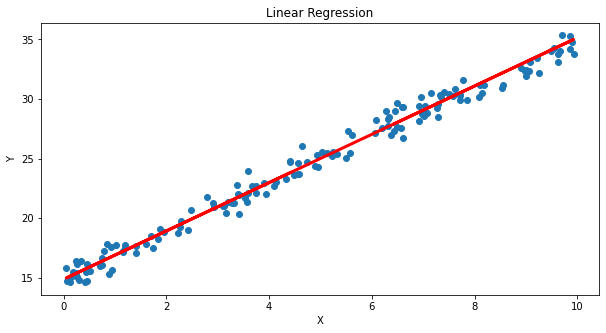

In [3]:
# Train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Linear Regression
#   Note:   It is needed to give both the fit and predict methods 2D arrays. 
#           Right now x_train and x_test are currently only 1 dimensional.
#           What we shoudl do to fix it is: 
x_train = x_train.reshape(-1, 1)
x_test  = x_test.reshape(-1, 1)

# Create linear regression object
model = LinearRegression()

# Train the model using the training sets
model.fit(x_train, y_train);

# Make predictions using the testing set
y_pred = model.predict(x_test)

# The coefficients
print('True model: y ~ N(μ, σ^2)')
print('True μ =', beta_0, '+', beta_1, '* x')
print('Regression μ = %.2f' % model.intercept_, '+ %.2f' % model.coef_[0], '* x')

# The mean squared error
print('Mean squared error: %.4f' % mean_squared_error(y_train, model.predict(x_train)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f' % r2_score(y_test, y_pred))

# Plot outputs
plt.figure(figsize=(10,5));
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red', linewidth=3);
plt.title('Linear Regression');
plt.xlabel('X');
plt.ylabel('Y');

## **3.** Linear Regression with `statsmodels`

In [4]:
# Train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Add (explicitly) the constant to the model
x_train = sm.add_constant(x_train)
x_test  = sm.add_constant(x_test)

# Fit and summarize OLS model
model = sm.OLS(y_train, x_train)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 2.620e+04
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:05:37   Log-Likelihood:                -369.94
No. Observations:                 350   AIC:                             743.9
Df Residuals:                     348   BIC:                             751.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8912      0.074    202.316      0.0

Some statistical tests.

* **Overall F-test for significance**<br>
$\quad$ `p-value = Prob (F-statistic) = 0.00` <br>
The F-statistic test is used to test the significance of regression coefficients in linear regression models. If the p-value is less than a certain significance level (*e.g.* 0.05, 0.01), the sample data provide sufficient evidence to conclude that the regression model fits the data better than the model with no independent variables.

* **T-test for the intercept and the coefficients**<br>
$\quad$ **`Intercept`** $\;$ `p-value = P>|t| = 0.00`<br>
$\quad$ **`Coefficient`** $\;$ `p-value = P>|t| = 0.00`<br>
The t-test helps to determine the correlation between the response and the predictor variables. The test is used in linear regression to test the null hypothesis $H_0$ that the slope or the coefficient is equal to zero.

True model: y ~ N(μ, σ^2)
True μ = 15 + 2 * x
Regression μ = 14.89 + 2.03 * x
Mean squared error: 0.52
Coefficient of determination: 0.99


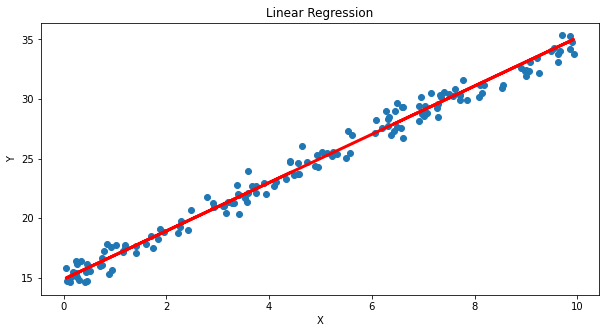

In [5]:
# Make predictions using the testing set
y_pred = model.predict(x_test)

# The coefficients
print('True model: y ~ N(μ, σ^2)')
print('True μ =', beta_0, '+', beta_1, '* x')
print('Regression μ = %.2f' % model.params[0], '+ %.2f' % model.params[1], '* x')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % model.rsquared)

# Plot outputs
plt.figure(figsize=(10,5));
plt.scatter(pd.DataFrame(x_test)[1], y_test)
plt.plot(pd.DataFrame(x_test)[1], y_pred, color='red', linewidth=3);
plt.title('Linear Regression');
plt.xlabel('X');
plt.ylabel('Y');